### Importing Libraries

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [283]:
market = pd.read_csv('/home/abdulsamod/Documents/backup/PROJECT/EB_project/supermarket_sales - Sheet1.csv')

In [284]:
market.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Cleaning 

In [285]:
market.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [286]:
market.duplicated().sum()

0

In [287]:
market.drop("Invoice ID", axis=1,inplace=True)

In [288]:
market['date'] = pd.to_datetime(market['Date'])

market['day'] = (market['date']).dt.day
market['month'] = (market['date']).dt.month
market['year'] = (market['date']).dt.year

market['Time'] = pd.to_datetime(market['Time'])
market['Hour'] = (market['Time']).dt.hour

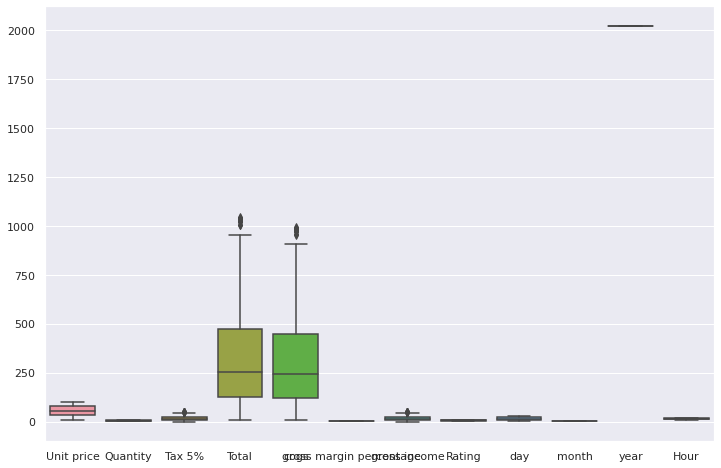

In [289]:
plt.figure(figsize=(12,8))
sns.boxplot(data=market);

In [290]:
def Outliers(col):
    Median = market[col].quantile(0.50)
    Max = market[col].quantile(0.95)
    market[col] = np.where(market[col]>Max, Median,market[col])
    return market[col]

In [291]:
Outliers("Total")
Outliers("cogs")
Outliers("Tax 5%")

0      26.1415
1       3.8200
2      16.2155
3      23.2880
4      30.2085
        ...   
995     2.0175
996    12.0880
997     1.5920
998     3.2910
999    30.9190
Name: Tax 5%, Length: 1000, dtype: float64

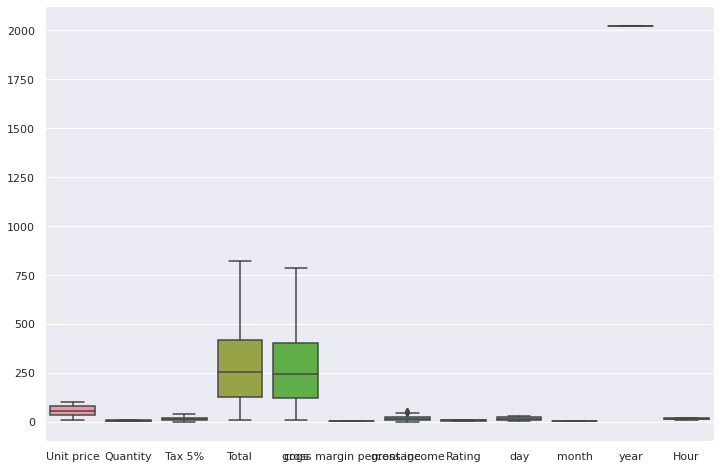

In [292]:
plt.figure(figsize=(12,8))
sns.boxplot(data=market);

### EDA

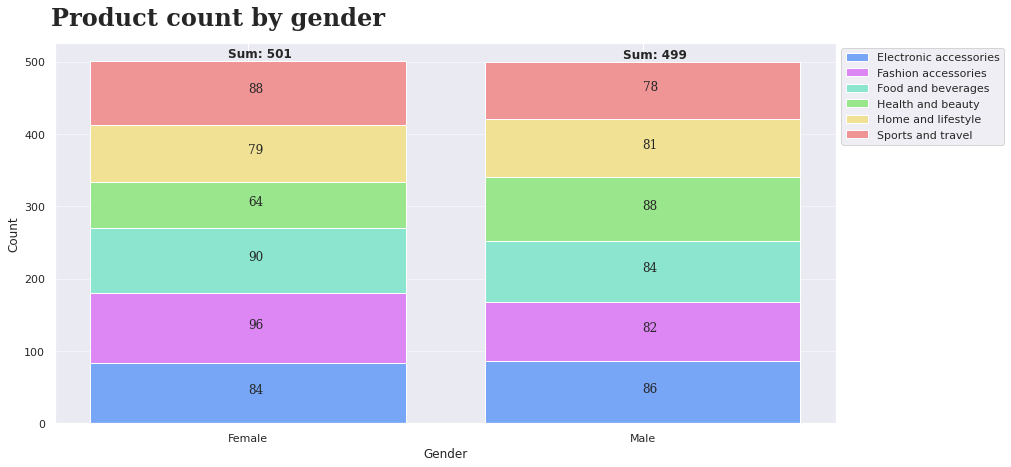

In [293]:
colors = ['#76a6f5', '#dd87f5', '#8ce6cf', '#9ae68c','#f0e195', '#f09595', '#fa9548']

product_gender = market[['Product line','Gender']].groupby('Gender')['Product line'].value_counts().unstack()
product_gender['sum'] = product_gender.sum(axis=1)

fig, ax = plt.subplots(figsize=(14,7))
bottom = len(product_gender) * [0]


for idx, name in enumerate(product_gender.columns[~product_gender.columns.isin(['sum'])]):
    ax.bar(product_gender.index, product_gender[name], color = colors[idx], bottom = bottom)
    bottom = bottom+product_gender[name]
    
for i in ax.patches:
    
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.text(x+width/2, y+height/2, f"{height}", fontfamily='serif')
    
for i, v in enumerate(product_gender['sum']):
    ax.text(i-0.05,v+5, str(f"Sum: {v}"), weight = 'bold')
    

ax.grid(axis='y', alpha = 0.5)   
    
plt.legend(product_gender.columns[~product_gender.columns.isin(['sum'])], bbox_to_anchor = [1,1,0,0])
plt.xlabel('Gender')
plt.ylabel('Count')

plt.text(-0.5, 550, 'Product count by gender', fontfamily = 'serif', fontweight = 'bold', fontsize = 24)
plt.show()


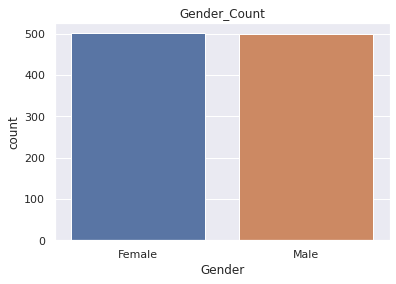

In [294]:
sns.set(style="darkgrid")       #style the plot background to become a grid
genderCount  = sns.countplot(x="Gender", data =market).set_title("Gender_Count")

Text(0.5, 1.0, 'Ratings by Branch')

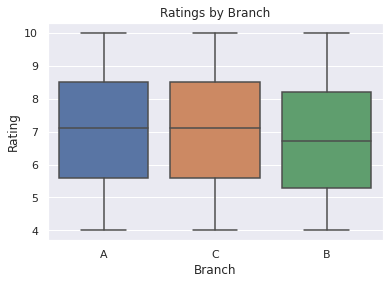

In [295]:
sns.boxplot(x="Branch", y = "Rating" ,data =market).set_title("Ratings by Branch") 

In [296]:
branches = market.Branch.value_counts()
branches

A    340
B    332
C    328
Name: Branch, dtype: int64

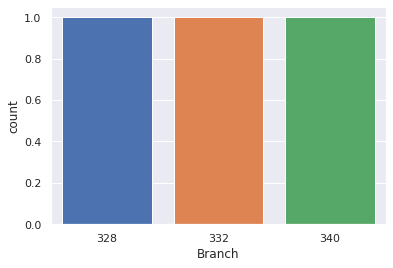

In [297]:
sns.countplot(data=market,x=branches, saturation=True);

as we see, 3 branches are approximately equal

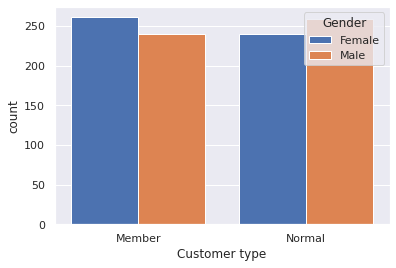

In [298]:
sns.countplot(data = market,x="Customer type", hue="Gender",saturation=True);

Females are more than in Mamber type, and the opposite in Normal type.

In [299]:
pro_line = market["Product line"].value_counts()
pro_line

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

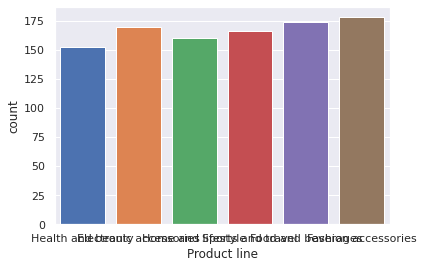

In [300]:
sns.countplot(data=market, x=market["Product line"],saturation=True);

### we notice in first 5 raws that the gross_income column values approximately equl to Tax_5% column values,
### let's make sure..

In [301]:
equal = market["gross income"] == market["Tax 5%"]
equal.value_counts()

True     950
False     50
dtype: int64

ok not equal then we not drop one of them

### which payment type most used in every city?

In [302]:
market["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [303]:
most_payment_type_in_cities = market.groupby("City")["Payment"].count()
most_payment_type_in_cities

City
Mandalay     332
Naypyitaw    328
Yangon       340
Name: Payment, dtype: int64

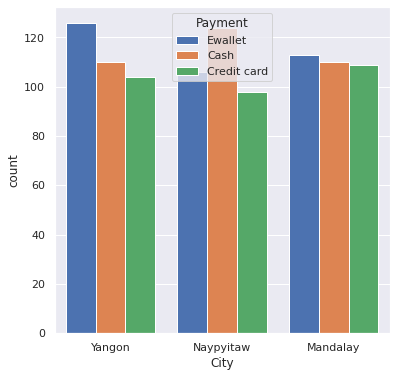

In [304]:
plt.figure(figsize=(6,6))
sns.countplot(data=market,x="City",hue="Payment",saturation=True);

Ewallet in Yangon & cash in Naypyitaw & Ewallet in Mandalay

In [305]:
px.bar(market,x='City',y='Total',color='City',animation_frame='Date',title='Change the date to see the differnce in the Total price of Country ',
      animation_group="Branch", range_y=[0,1000])

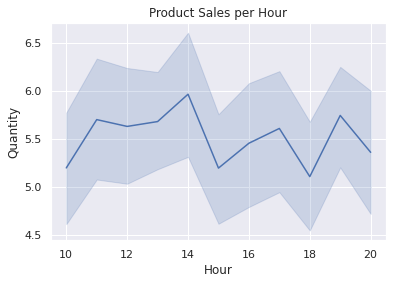

In [306]:
genderCount  = sns.lineplot(x="Hour",  y = 'Quantity',data =market).set_title("Product Sales per Hour")


<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

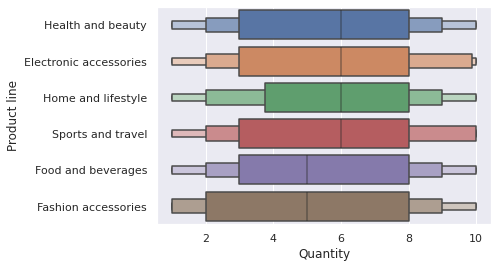

In [307]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=market )


<AxesSubplot:xlabel='Rating', ylabel='Product line'>

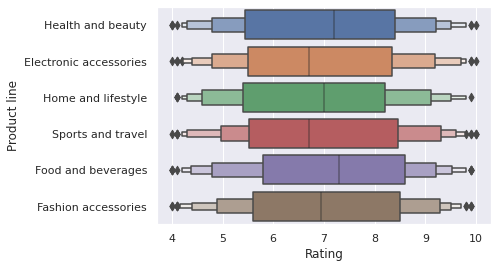

In [308]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=market )


Text(0.5, 1.0, 'Payment Channel')

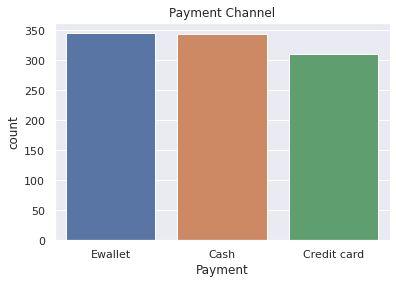

In [309]:
 sns.countplot(x="Payment", data =market).set_title("Payment Channel") 


Text(0.5, 1.0, 'Payment Channel by Branch')

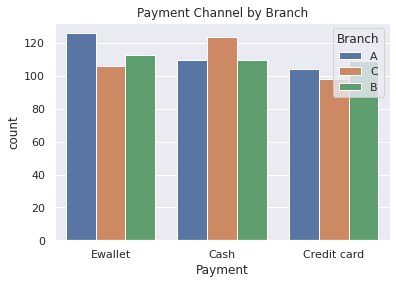

In [310]:
 sns.countplot(x="Payment", hue = "Branch", data =market).set_title("Payment Channel by Branch") 


In [311]:
X = market[['Gender', 'Product line', 'Quantity', 'gross income', 'Rating']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        1000 non-null   object 
 1   Product line  1000 non-null   object 
 2   Quantity      1000 non-null   int64  
 3   gross income  1000 non-null   float64
 4   Rating        1000 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB


In [312]:
X=pd.get_dummies(X)

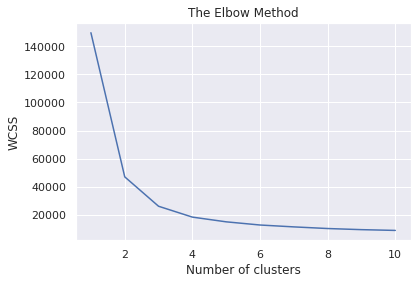

In [313]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
#Initiate Wcss using empty list
wcss = []
#initiate iteration process using a for loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    #Append results to wcss list
    wcss.append(kmeans.inertia_)
#Plot results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [314]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state = 42)
y_km = kmeans.fit_predict(X)

In [315]:
y_km

array([0, 2, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0,
       2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2,
       0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 2, 1, 2, 0,
       2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,